# Загрузка Pandas и очистка данных

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime, timedelta
import operator
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv('main_task.csv')

In [3]:
RANDOM_SEED = 42

In [4]:
# загрузим справочник с информацией о городах
city_info = {
    'Paris':
    {
        'population': 2138551,
        'sunshine_hour': 1662,
        'capital': 1,
        'country': 'France',
        'salary': 2970.50
    },
    'Stockholm':
    {
        'population': 1515017,
        'sunshine_hour': 1821,
        'capital': 1,
        'country': 'Sweden',
        'salary': 3016.63
    },
    'London':
    {
        'population': 7556900,
        'sunshine_hour': 1410,
        'capital': 1,
        'country': 'GreatBritain',
        'salary': 3596.46
    },
    'Berlin':
    {
        'population': 3426354,
        'sunshine_hour': 1625,
        'capital': 1,
        'country': 'Germany',
        'salary': 2961.31
    },
    'Munich':
    {
        'population': 1260391,
        'sunshine_hour': 1709,
        'capital': 0,
        'country': 'Germany',
        'salary': 3198.35
    },
    'Oporto':
    {
        'population': 249633,
        'sunshine_hour': 2468,
        'capital': 0,
        'country': 'Portugal',
        'salary': 986.84
    },
    'Milan':
    {
        'population': 1236837,
        'sunshine_hour': 1914,
        'capital': 0,
        'country': 'Italy',
        'salary': 1936.43
    },
    'Bratislava':
    {
        'population': 423737,
        'sunshine_hour': 2042,
        'capital': 1,
        'country': 'Slovakia',
        'salary': 1363.12
    },
    'Vienna':
    {
        'population': 1691468,
        'sunshine_hour': 1930,
        'capital': 1,
        'country': 'Austria',
        'salary': 2543.63
    },
    'Rome':
    {
        'population': 2318895,
        'sunshine_hour': 2472,
        'capital': 1,
        'country': 'Italy',
        'salary': 1704.60
    },
    'Barcelona':
    {
        'population': 1621537,
        'sunshine_hour': 2524,
        'capital': 0,
        'country': 'Spain',
        'salary': 1685.51
    },
    'Madrid':
    {
        'population': 3255944,
        'sunshine_hour': 2769,
        'capital': 1,
        'country': 'Spain',
        'salary': 1913.60
    },
    'Dublin':
    {
        'population': 1024027,
        'sunshine_hour': 1424,
        'capital': 1,
        'country': 'Irland',
        'salary': 2955.49
    },
    'Brussels':
    {
        'population': 1019022,
        'sunshine_hour': 1546,
        'capital': 1,
        'country': 'Belgium',
        'salary': 2824.34,
    },
    'Zurich':
    {
        'population': 341730,
        'sunshine_hour': 1566,
        'capital': 0,
        'country': 'Switzeland',
        'salary': 7051.92
    },
    'Warsaw':
    {
        'population': 1702139,
        'sunshine_hour': 1676,
        'capital': 1,
        'country': 'Poland',
        'salary': 1093.77
    },
    'Budapest':
    {
        'population': 1741041,
        'sunshine_hour': 1928,
        'capital': 1,
        'country': 'Hungary',
        'salary': 883.86
    },
    'Copenhagen':
    {
        'population': 1153615,
        'sunshine_hour': 1780,
        'capital': 1,
        'country': 'Denmark',
        'salary': 3805.44
    },
    'Amsterdam':
    {
        'population': 741636,
        'sunshine_hour': 1662,
        'capital': 1,
        'country': 'Denmark',
        'salary': 3454.92
    },
    'Lyon':
    {
        'population': 472317,
        'sunshine_hour': 2002,
        'capital': 0,
        'country': 'France',
        'salary': 2509.05
    },
    'Hamburg':
    {
        'population': 1739117,
        'sunshine_hour': 1557,
        'capital': 0,
        'country': 'Germany',
        'salary': 2788.01
    },
    'Lisbon':
    {
        'population': 517802,
        'sunshine_hour': 2799,
        'capital': 1,
        'country': 'Portugal',
        'salary': 1181.78
    },
    'Prague':
    {
        'population': 1165581,
        'sunshine_hour': 1668,
        'capital': 1,
        'country': 'CzechRepublic',
        'salary': 1361.87
    },
    'Oslo':
    {
        'population': 580000,
        'sunshine_hour': 1668,
        'capital': 1,
        'country': 'Norway',
        'salary': 3518.71
    },
    'Helsinki':
    {
        'population': 558457,
        'sunshine_hour': 1780,
        'capital': 1,
        'country': 'Finland',
        'salary': 3038.58
    },
    'Edinburgh':
    {
        'population': 464990,
        'sunshine_hour': 1380,
        'capital': 1,
        'country': 'Scotland',
        'salary': 2390.36
    },
    'Geneva':
    {
        'population': 200000,
        'sunshine_hour': 1828,
        'capital': 0,
        'country': 'Switzeland',
        'salary': 6473.85
    },
    'Ljubljana':
    {
        'population': 272220,
        'sunshine_hour': 1712,
        'capital': 1,
        'country': 'Slovenia',
        'salary': 1421.39
    },
    'Athens':
    {
        'population': 664046,
        'sunshine_hour': 2771,
        'capital': 1,
        'country': 'Greece',
        'salary': 925.83,
    },
    'Luxembourg':
    {
        'population': 628165,
        'sunshine_hour': 1630,
        'capital': 1,
        'country': 'Luxembourg',
        'salary': 4456.51
    },
    'Krakow':
    {
        'population': 755050,
        'sunshine_hour': 1400,
        'capital': 0,
        'country': 'Poland',
        'salary': 932.56
    }
}

In [5]:
# перед обработкой NAN вынесем информацию о наличии пропуска как отдельный признак
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [6]:
# заполняем пропуски 0
data['Number of Reviews'].fillna(0, inplace=True)

In [7]:
# добавление признака количества основного ресторана и его филиалов
data['count_branch'] = data.groupby(['Restaurant_id'])['Restaurant_id'].transform('count')

In [8]:
# добавление признака количества дней между отзывами
# разбиваем столбец объединяющий отзывы и даты отзывов
df = data['Reviews'].str.split(', \[\'', expand=True)
df[1] = df[1].str.strip(']')
df[1] = df[1].str.strip('\'')

# разделеине 2-х дат на различные столбцы для получения разницы
df = df[1].str.split('\', \'', expand=True)
df[0].fillna(0, inplace=True)
df[1].fillna(0, inplace=True)

df[0] = pd.to_datetime(df[0])
df[1] = pd.to_datetime(df[1])
data['count_day_reviews'] = df[0] - df[1]

date_today = datetime.strptime('2020-09-20', '%Y-%m-%d')
data['count_day_reviews_today'] = date_today - df[0]

In [9]:
# конвертируем datetime в int для модели обучения
data['count_day_reviews'] = data['count_day_reviews'] / pd.to_timedelta('1D')
data['count_day_reviews_today'] = data['count_day_reviews_today'] / \
    pd.to_timedelta('1D')

In [10]:
# добавление признака города заменой значения из словаря на количественное
city = {}  # создаём пустой словарь для хранения информации о городе
i = 1

for letter in data['City']:
    city[letter] = 0
for letter in city:
    city[letter] = i
    i += 1

data['city_dict'] = data['City'].apply(lambda x: city[x] if x in city else None)

In [11]:
# добавление признака столицы
data['city_country'] = data['City'].apply(
    lambda x: city_info[x]['country'] if x in city else None)

country = {}  # создаём пустой словарь для хранения информации о городе
i = 1

for letter in data['city_country']:
    country[letter] = 0
for letter in country:
    country[letter] = i
    i += 1

data['city_country'] = data['city_country'].apply(lambda x: country[x] if x in country else None)

In [12]:
# добавление признака количества населения города
data['population_city'] = data['City'].apply(lambda x: city_info[x]['population'] if x in city else None)

In [13]:
# добавление признака количества солнечных дней города
data['sunshine_hour_city'] = data['City'].apply(lambda x: city_info[x]['sunshine_hour'] if x in city else None)

In [14]:
# добавление признака столицы города (0- не столица/ 1- столица)
data['capital'] = data['City'].apply(lambda x: city_info[x]['capital'] if x in city else None)

In [15]:
# добавление признака количества кухонь ресторана
data['Cuisine Style'] = data['Cuisine Style'].fillna('Other')
data['count_cuisine_style'] = data['Cuisine Style'].str.count(',') + 1

In [16]:
# используем dummy variables для создания признака по кухням ресторанов
df['cuisine_style'] = data['Cuisine Style'].str.strip('[]')
df['cuisine_style'] = df['cuisine_style'].str.strip('\'\'')

# создание справочника с наименованиями кухонь и количеством повторений в ресторанах для выбора
df['cuisine_style'] = df['cuisine_style'].fillna('Other')
cuisine_style = {}
for letter in df['cuisine_style']:
    cuisine = letter.split('\', \'')
    for let in cuisine:
        if let in cuisine_style.keys():
            cuisine_style[let] += 1
        else:
            cuisine_style[let] = 1           

cuisine = list(cuisine_style.values())
sorted_cuisine = sorted(cuisine_style.items(), key=operator.itemgetter(1))

cuisine = ['Mediterranean', 'Italian']
def find_item(cell):
    if item in cell:
        return 1
    return 0


for item in cuisine:
    data[item] = data['Cuisine Style'].apply(find_item)

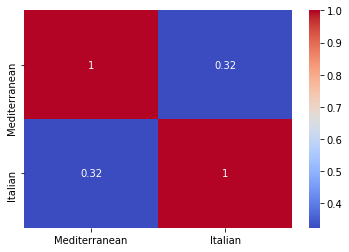

In [17]:
# построим тепловую карту для оценки корреляции между новыми признаками по кухням ресторана (ранее признаков было больше, карта более показательна)
new_df = data[['Mediterranean', 'Italian']]
correlation = new_df.corr()
sns.heatmap(correlation,annot = True, cmap = 'coolwarm')

In [18]:
# добавление признака диапазон цен в ресторане из словаря на количественное значение
price_range = {'$': 1, '$$ - $$$': 2, '$$$$': 3}

data['price_range'] = data['Price Range'].apply(lambda x: price_range[x] if x in price_range else None)

# так как большинство ресторанов имеют средний диапазон цен, заменим пусвтые значения на соотв. значение
data['price_range'] = data['price_range'].fillna(2)

In [19]:
# признак средней заработной платы в городе
data['salary_city'] = data['City'].apply(lambda x: city_info[x]['salary'] if x in city else None)

In [20]:
# заполним пропущенные значения (None или NaN) средним арифметическим) для всего столбца
data['count_day_reviews'] = data['count_day_reviews'].fillna(data['count_day_reviews'].mean())
data['count_day_reviews_today'] = data['count_day_reviews_today'].fillna(data['count_day_reviews_today'].mean())

### Посмотрим распределение признака

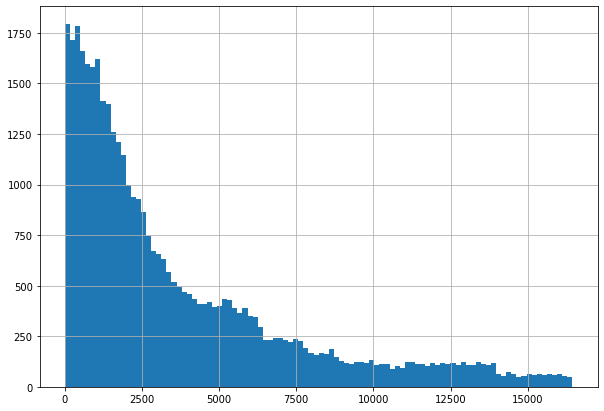

In [21]:
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

In [22]:
# большинство ресторанов имеет не высокий рейтинг

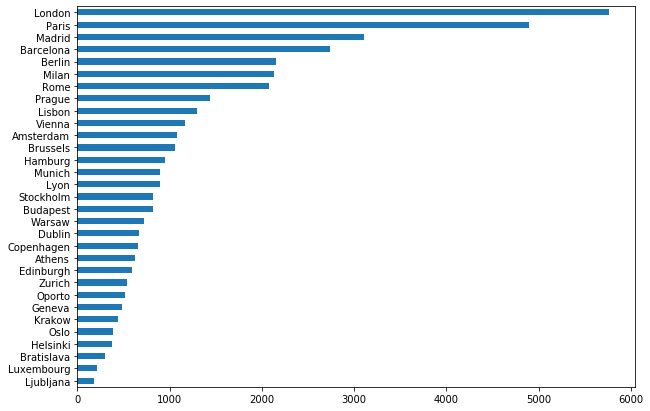

In [23]:
data['City'].value_counts(ascending=True).plot(kind='barh')

большинство ресторанов находится в Лондоне

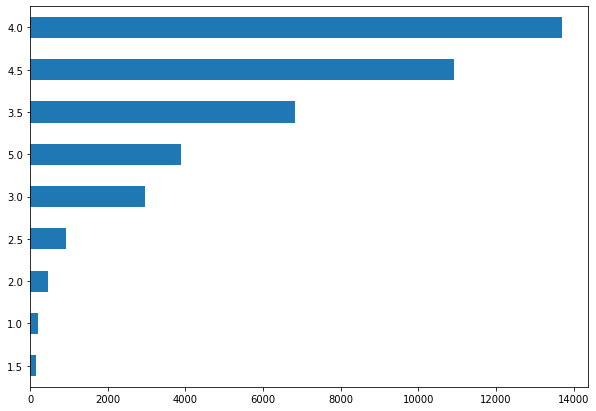

In [24]:
data['Rating'].value_counts(ascending=True).plot(kind='barh')

большинство ресторанов имеют оценку 4

In [25]:
# после добавления признаков удаляем столбцы, содержащие данные типа object
data = data.drop(data.select_dtypes(include=['object']), axis=1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ranking                  40000 non-null  float64
 1   Rating                   40000 non-null  float64
 2   Number of Reviews        40000 non-null  float64
 3   Number_of_Reviews_isNAN  40000 non-null  uint8  
 4   Cuisine_Style_isNAN      40000 non-null  uint8  
 5   Price_Range_isNAN        40000 non-null  uint8  
 6   count_branch             40000 non-null  int64  
 7   count_day_reviews        40000 non-null  float64
 8   count_day_reviews_today  40000 non-null  float64
 9   city_dict                40000 non-null  int64  
 10  city_country             40000 non-null  int64  
 11  population_city          40000 non-null  int64  
 12  sunshine_hour_city       40000 non-null  int64  
 13  capital                  40000 non-null  int64  
 14  count_cuisine_style   

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [27]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = data.drop(['Rating'], axis = 1)
y = data['Rating']

In [28]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [29]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [30]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [31]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [32]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2074935


Метрика Mean Absolute Error (MAE) имеет среднее отклонение предсказанных значений от фактических = 0.2074935

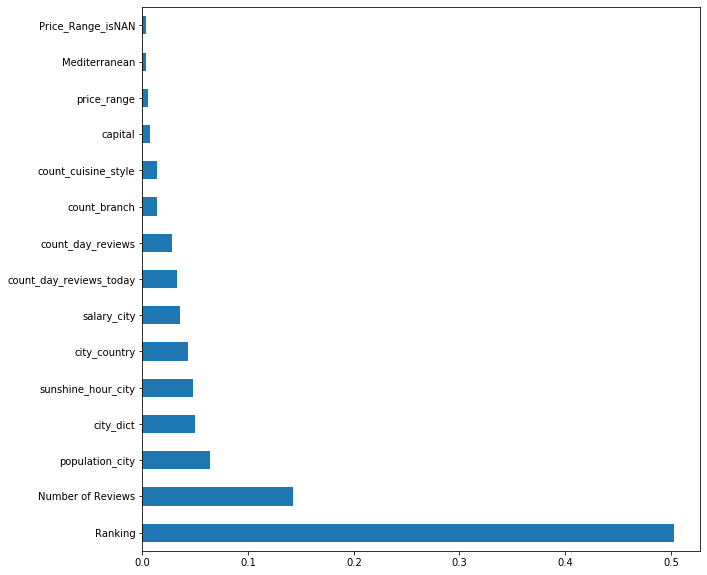

In [34]:
# выведем самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

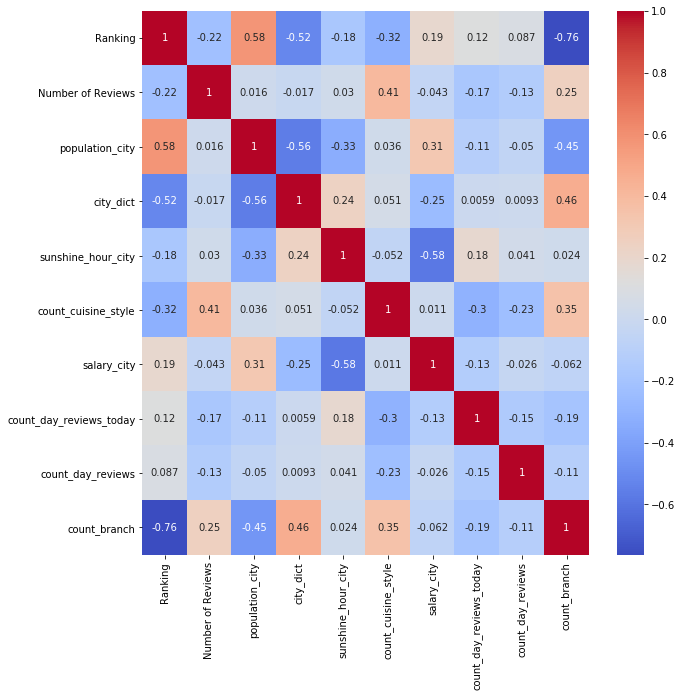

In [41]:
# построим тепловую карту для оценки корреляции между новыми признаками по кухням ресторана (ранее признаков было больше, карта более показательна)
new_df = data[['Ranking', 'Number of Reviews', 'population_city', 'city_dict', 'sunshine_hour_city', 'count_cuisine_style', 'salary_city', 'count_day_reviews_today',
               'count_day_reviews', 'count_branch']]
correlation = new_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [36]:
feat_importances

Ranking                    0.502855
Number of Reviews          0.142758
Number_of_Reviews_isNAN    0.002008
Cuisine_Style_isNAN        0.002994
Price_Range_isNAN          0.003040
count_branch               0.014008
count_day_reviews          0.027834
count_day_reviews_today    0.032377
city_dict                  0.049750
city_country               0.042814
population_city            0.064316
sunshine_hour_city         0.047913
capital                    0.007055
count_cuisine_style        0.013556
Mediterranean              0.003072
Italian                    0.002735
price_range                0.005156
salary_city                0.035761
dtype: float64